# **Melanoma Detection Assignment**

**Problem statement:** 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Import required libraries 

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers, datasets, models
from keras.models import Sequential

In [2]:
# Import drive to from google.colab to upload the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path_to_dataset = "/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip"
path = "/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment"

In [7]:
# Unzip the dataset from google drive in local environmentin the folder dataset
import zipfile
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Melanoma Assignment/CNN_assignment.zip", 'r')
zip_ref.extractall("/dataset")
zip_ref.close()

In [8]:
path_to_train_directory = "/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
path_to_test_directory = "/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [9]:
import os
len(os.listdir(path_to_train_directory))

9

In [10]:
# Count the number of training and testing images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)
     

2239
118


**Observation**

This assignment uses a dataset of about 2357 images of skin cancer types. 2239 training images and 118 testing images.The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.


# Load images using keras.preprocessing
###  Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

In [11]:
# Define batch size, height and width of the image for the loaders
batch_size = 32
img_height = 180
img_width = 180
     


**Note:**

Use 80% of the images for training, and 20% for validation.


In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed =123,
    validation_split = 0.2,
    subset = 'validation',
    image_size =(img_height,img_width),
    batch_size = batch_size
)
     

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

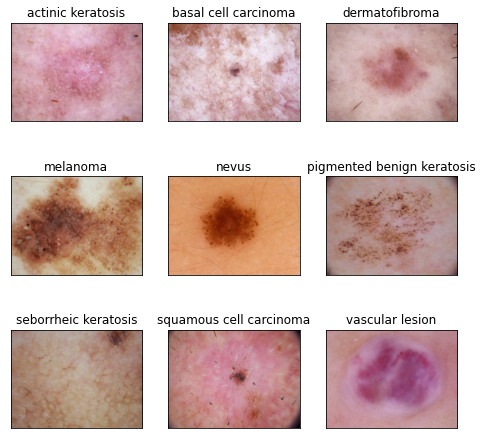

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
train_ds

plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i] +"/*.jpg"))[1]))
  plt.imshow(image)
  plt.title(class_names[i])

plt.show()


# Model Building

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model
Todo: 
  1. Create a CNN model, which can accurately detect 9 classes present in the dataset.
  2. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
  3. The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

# Model1

Layer1 - Convolution - 3X3 Kernel size - 32 Filters - activation Function (Relu)

Layer2 - Convolution - 3X3 Kernel size -32 Filters - activation Function (Relu)

Layer3 - MaxPooling

Layer4 - Convolution - 3X3 Kernel size - 64 Filters - activation Function (Relu)

Layer5 - Convolution - 3X3 Kernel size - 64 Filters - activation Function (Relu)

Layer6 - MaxPooling

Layer7 - Flatten

Layer8 - Fully Connected hidden Layer - 64 neurons - activation function (Relu)

Layer9 - Dropouts(0.5)

Layer10 - Fullyconnected output layer with 9 classes -activation function(softmax)

In [ ]:

num_classes = 9
model=models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,32),padding = 'same'))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Note:**

The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications.
The best loss function for multi-class classification problem is categorical cross entropy.

**Reference:** https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=The%20results%20of%20the%20Adam,for%20most%20of%20the%20applications.

In [ ]:

# View the summary of all layers
model.summary()
     

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 64)        36928     
                                                     

# Train the model

In [ ]:
# Number of epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 78ms/step - loss: 2.1687 - accuracy: 0.2360 - val_loss: 1.7532 - val_accuracy: 0.3400
Epoch 2/20
56/56 [==============================] - 4s 75ms/step - loss: 1.8165 - accuracy: 0.3672 - val_loss: 1.6801 - val_accuracy: 0.3714
Epoch 3/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6699 - accuracy: 0.4247 - val_loss: 1.5673 - val_accuracy: 0.4698
Epoch 4/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6308 - accuracy: 0.4314 - val_loss: 1.4264 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 4s 75ms/step - loss: 1.5286 - accuracy: 0.4721 - val_loss: 1.3891 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 1.4809 - accuracy: 0.4855 - val_loss: 1.3949 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 1.4186 - accuracy: 0.5084 - val_loss: 1.4861 - val_accuracy: 0.5101
Epoch 8/20
56

**Observation**

1. The training accuracy of 20th epoch is 67.97% and validation accuracy is 54.59%.
2. The accuracy of training dataset is greater than the validation dataset.This shows the Overfitting or high variance issue in the above model.  
3. There is a large variation in each epoch between the training and validation accuracy.
4.  But most of the cases the accuracy of our training dataset is greater than our validating accuracy. In terms of ‘loss’, overfitting reveals itself when our model has a low error in the training set and a higher error in the validation set.

**Decision**:

We can identify this visually by plotting loss and accuracy metrics and seeing where the performance metrics converge for both datasets.

# Visualising the training result of Model1

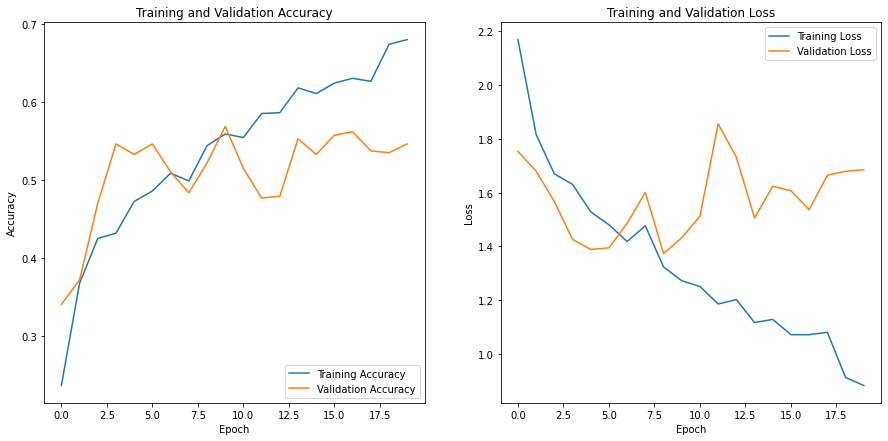

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
     

**Observation**

1. The accuracy of training dataset is increasing for every epoch but the accuracy of validation dataset is showing high variation in each epoch. But the accuracy of validation dataset is less than the training dataset after 10th epochs.

2. The loss of training dataset is decresing for every epoch but the loss of validation dataset is also showing high variation in each epoch, but the loss is greater than the training dataset after 10th epoch.

3. This is the result of overfitting of the model. The model fits too well to the training set. It then becomes difficult for the model to generalize to new examples that were not in the training set. 

**Decision**

Steps for reducing overfitting:

1. Add more data
2. Use data augmentation
3. Use architectures that generalize well
4. Add regularization (mostly dropout, L1/L2 regularization are also possible)
5. Reduce architecture complexity.

**Reference**
1. https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d#:~:text=Overfitting%20happens%20when%20your%20model,set%20instead%20of%20general%20patterns.

2. https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/

# Choose an appropriate data augmentation strategy to resolve overfitting 

In [15]:
# Create few preprocessing layers of Data augmentation 

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip(mode ='horizontal_and_vertical'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(factor = 0.2, fill_mode='reflect'),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor = (0.2,0.3), width_factor = (0.2,0.3),fill_mode ='reflect'),
  tf.keras.layers.experimental.preprocessing.RandomContrast(factor = 0.2)
])

Text(0.5, 1.0, 'vascular lesion After data augmentation')

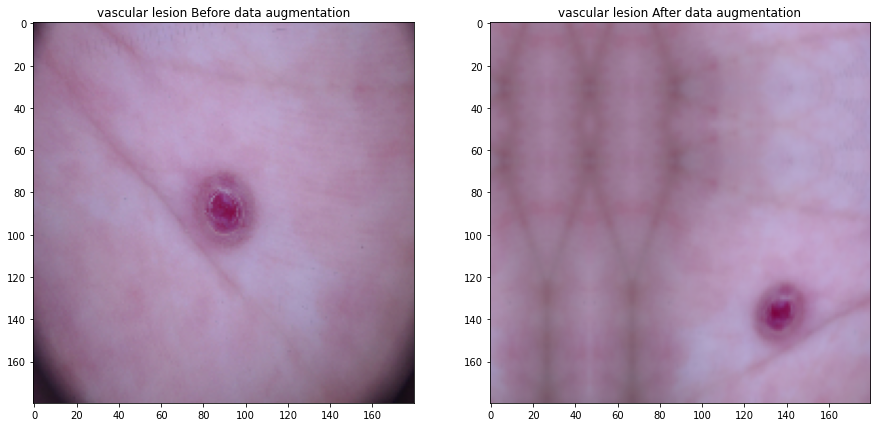

In [16]:
image, label = next(iter(train_ds))
plt.figure(figsize=(15,7))
ax = plt.subplot(1,2,1)
plt.imshow(image[0].numpy().astype("uint8"))
plt.title(class_names[label[0]]+ " Before data augmentation")
ax = plt.subplot(1,2,2)
plt.imshow(data_augmentation(image)[0].numpy().astype('uint8'))
plt.title(class_names[label[0]]+ " After data augmentation")

# Model2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
num_classes = 9
model=models.Sequential([data_augmentation,tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,32),padding = 'same'))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Number of epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 33s 330ms/step - loss: 2.4213 - accuracy: 0.1786 - val_loss: 2.0593 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 16s 277ms/step - loss: 2.0667 - accuracy: 0.2037 - val_loss: 2.0347 - val_accuracy: 0.1566
Epoch 3/20
56/56 [==============================] - 16s 278ms/step - loss: 2.0486 - accuracy: 0.2199 - val_loss: 2.0356 - val_accuracy: 0.2036
Epoch 4/20
56/56 [==============================] - 16s 278ms/step - loss: 2.0304 - accuracy: 0.2009 - val_loss: 2.0303 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 16s 284ms/step - loss: 1.9836 - accuracy: 0.2584 - val_loss: 1.8609 - val_accuracy: 0.2953
Epoch 6/20
56/56 [==============================] - 16s 278ms/step - loss: 1.9854 - accuracy: 0.2634 - val_loss: 1.9709 - val_accuracy: 0.2707
Epoch 7/20
56/56 [==============================] - 16s 279ms/step - loss: 1.9118 - accuracy: 0.2913 - val_loss: 1.8254 - val_accuracy: 0.3266
Epoch 8/20

**Observation**

1. There is no improvement in accuracy of training and validation dataset.


# Visualize the result of Model2

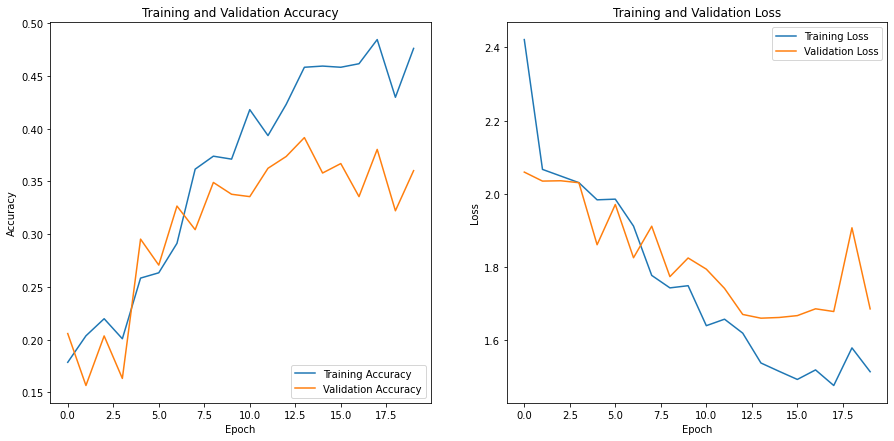

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Observation**

The graph shows, there is high variation of accuracy and also loss in each epoch for both training and validation dataset.



**Find the distribution of classes in the training dataset.**

**Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.**

<BarContainer object of 9 artists>

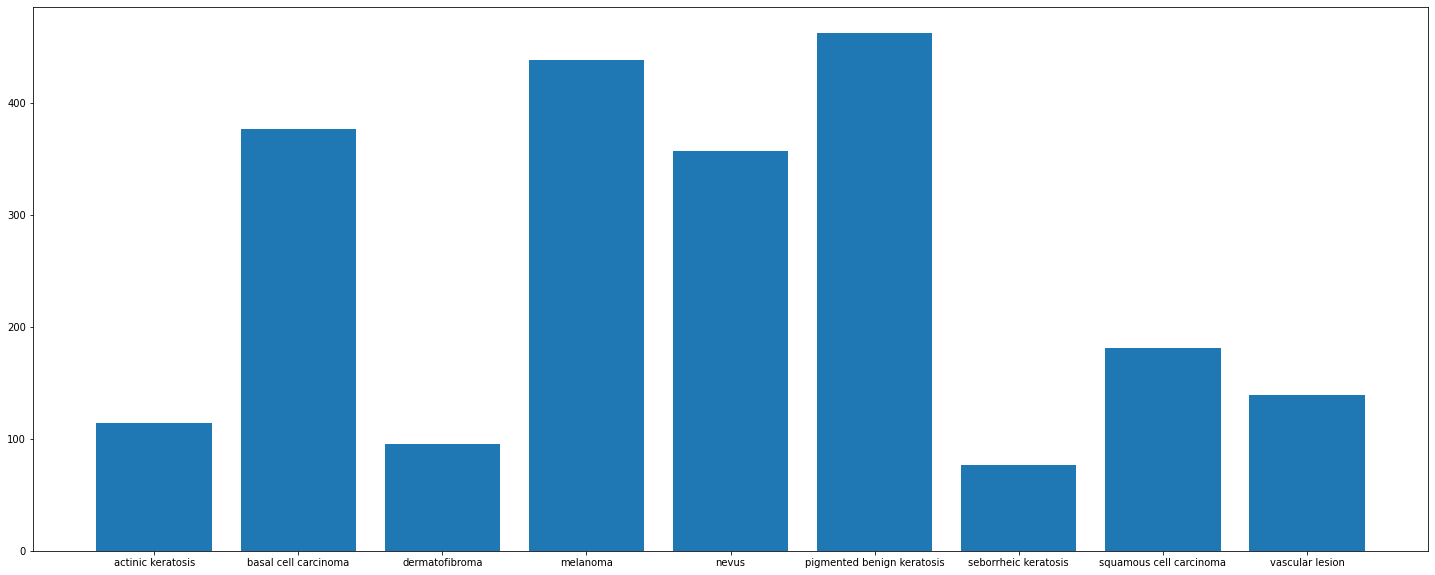

In [ ]:
# Find the distribution of classes in the training dataset
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Observation**

1. Melanoma and pigmented benign kerotosis has proportionaly greater number of samples.
2. actinic keratosis, dermatofibroma and seborrheic keratosis has least number of samples

**Rectify the class imbalance**

**Context:We can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.**

# Rectify the class imbalance using Augmentor library

In [17]:
# Install Augmentor library to balance the samples across all the classes
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Steps need to follow:**

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing our initial image data set.
2. Define a number of operations to perform on this data set using our Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [18]:
path_to_training_dataset="/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +"/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
     

Initialised with 114 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15AA011310>: 100%|██████████| 500/500 [00:20<00:00, 24.64 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1593F8C8E0>: 100%|██████████| 500/500 [00:23<00:00, 21.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F160FB04D60>: 100%|██████████| 500/500 [00:20<00:00, 23.87 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F15AA05E670>: 100%|██████████| 500/500 [01:43<00:00,  4.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=957x723 at 0x7F160F7C9EE0>: 100%|██████████| 500/500 [01:17<00:00,  6.46 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1593F5F1F0>: 100%|██████████| 500/500 [00:15<00:00, 31.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F15AA632A60>: 100%|██████████| 500/500 [00:39<00:00, 12.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F15AA0EC2B0>: 100%|██████████| 500/500 [00:16<00:00, 31.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15AA0251F0>: 100%|██████████| 500/500 [00:19<00:00, 25.16 Samples/s]


**Note**

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [19]:
# Look at total count of augmented images
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Note:**

Lets see the distribution of augmented data after adding new images to the original training data.

<BarContainer object of 9 artists>

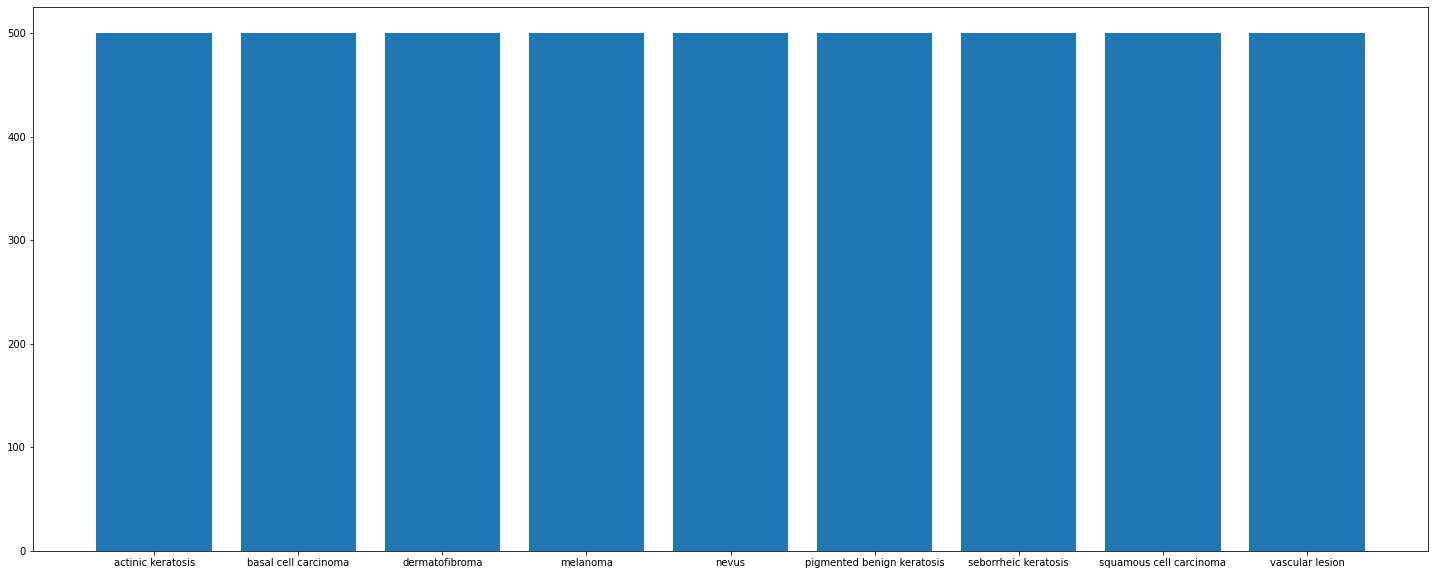

In [20]:
# Find the distribution of classes in the training dataset
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Note:**

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# Train the model on the data created using Augmentor

In [21]:
# Initialize the batch size and the image size
batch_size = 32
img_height = 180
img_width = 180

## Create a training dataset

In [22]:
# "path to directory with training data + data created using augmentor"
import pathlib
path_to_train_directory="/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(path_to_train_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


## Create a validation dataset

In [23]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Model3
### Create the model using newly created datasets (make sure to include normalization)

In [24]:
num_classes = 9
model=models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,32),padding = 'same'))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

In [25]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Number of epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 39s 168ms/step - loss: 1.9330 - accuracy: 0.2589 - val_loss: 1.7201 - val_accuracy: 0.3563
Epoch 2/30
169/169 [==============================] - 29s 167ms/step - loss: 1.7147 - accuracy: 0.3533 - val_loss: 1.5146 - val_accuracy: 0.3987
Epoch 3/30
169/169 [==============================] - 28s 163ms/step - loss: 1.5942 - accuracy: 0.3909 - val_loss: 1.5101 - val_accuracy: 0.4462
Epoch 4/30
169/169 [==============================] - 28s 158ms/step - loss: 1.4854 - accuracy: 0.4284 - val_loss: 1.3537 - val_accuracy: 0.4714
Epoch 5/30
169/169 [==============================] - 28s 162ms/step - loss: 1.4372 - accuracy: 0.4546 - val_loss: 1.2804 - val_accuracy: 0.5137
Epoch 6/30
169/169 [==============================] - 28s 158ms/step - loss: 1.3497 - accuracy: 0.4735 - val_loss: 1.2636 - val_accuracy: 0.5234
Epoch 7/30
169/169 [==============================] - 28s 159ms/step - loss: 1.2931 - accuracy: 0.4878 - val_loss: 1.1871 - val_accuracy: 0.5

**Observation**

1. After the use of augmentor to rectify the imbalance of the samples of the classes and by increasng the dataset size, the accuracy of the training and validation dataset improved.
2. The overfitting issue also reduced but still the problem is there. 
3. The 83.03% accuracy of training and 78.40% of accuracy of validation data set is not enough.

# Visualise the result of Model3

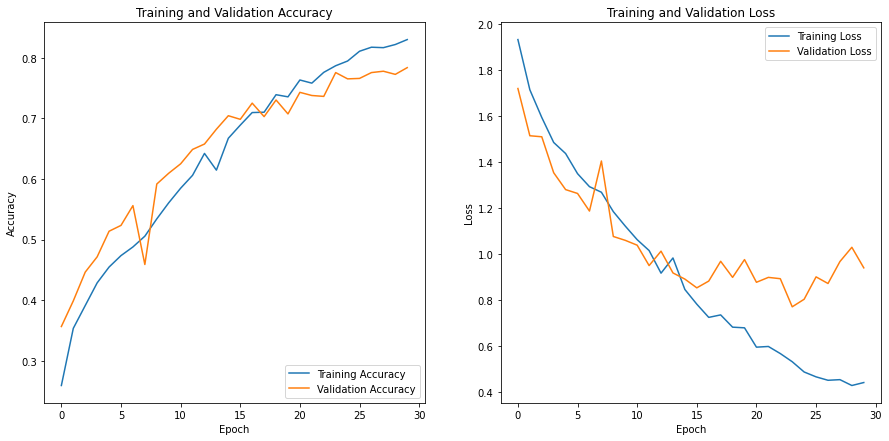

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Observation**

1. The graph shows that the accuracy of training and validation dataset are increases with each epoch with less variations.
2. The loss of training and validation dataset looks almost same till 15th epoch after that the loss of training dataset decreases but loss of validation dataset almost remains same
3. There is no much variation between the accuracy of training and validation datasets.

In [28]:
model.save('model3_30epochs.h5')

In [29]:
!cp -r 'model3_30epochs.h5' '/content/gdrive/MyDrive/Melanoma Assignment'

**Note**
1. Add more data by using Augmentor library with some of data augmentation strategy. 


In [ ]:
# Save the the augmented dataset in google drive 
!cp -r "/dataset" "/content/gdrive/MyDrive"

# Model 4

Add a layer of Dropout for each convolution unit 

In [30]:
num_classes = 9
model=models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,32),padding = 'same'))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

In [31]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# Train the model for 30 epochs 
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 29s 163ms/step - loss: 2.3082 - accuracy: 0.1385 - val_loss: 2.1924 - val_accuracy: 0.1381
Epoch 2/30
169/169 [==============================] - 28s 160ms/step - loss: 2.1825 - accuracy: 0.1404 - val_loss: 2.1884 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 28s 161ms/step - loss: 2.1591 - accuracy: 0.1636 - val_loss: 2.1523 - val_accuracy: 0.1648
Epoch 4/30
169/169 [==============================] - 28s 162ms/step - loss: 2.1493 - accuracy: 0.1621 - val_loss: 2.1566 - val_accuracy: 0.1641
Epoch 5/30
169/169 [==============================] - 28s 163ms/step - loss: 2.1745 - accuracy: 0.1493 - val_loss: 2.1832 - val_accuracy: 0.1433
Epoch 6/30
169/169 [==============================] - 29s 164ms/step - loss: 2.1952 - accuracy: 0.1424 - val_loss: 2.1793 - val_accuracy: 0.1463
Epoch 7/30
169/169 [==============================] - 28s 163ms/step - loss: 2.1707 - accuracy: 0.1458 - val_loss: 2.1432 - val_accuracy: 0.1

**Observation**

1. Adding Dropout layer did't improved the model
2. The model has overfitting problem.

**Decision:**

Create some more data using augmentor library and different data augmentation operations. 

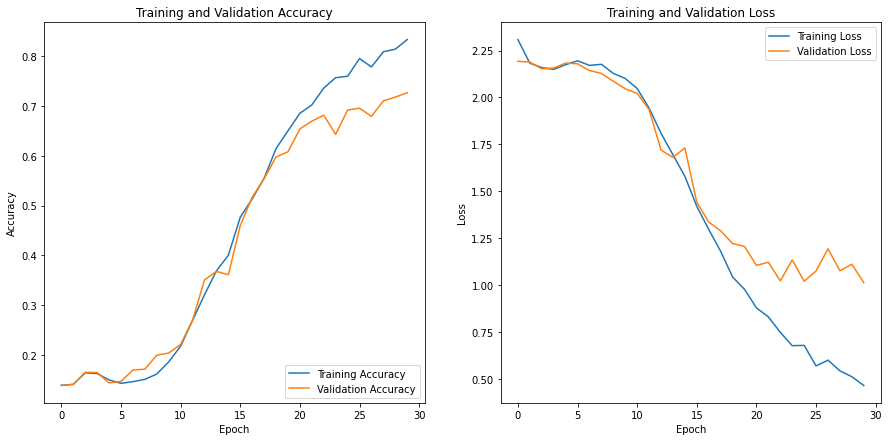

In [33]:
# Visualisation of results of model4
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Create some more data samples using Augmentor library to improve the model

In [34]:
path_to_training_dataset="/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +"/"+ i)

    # Add some operations to an existing pipeline.

    # First, we add a horizontal flip operation to the pipeline:
    p.flip_left_right(probability=0.4)

    # Now we add a vertical flip operation to the pipeline:
    p.flip_top_bottom(probability=0.8)

    # Add a rotate90 operation to the pipeline:
    p.rotate90(probability=0.1)
    
    p.sample(100) ## We are adding 100 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15AA61C400>: 100%|██████████| 100/100 [00:01<00:00, 68.30 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1589695FD0>: 100%|██████████| 100/100 [00:01<00:00, 66.43 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1589542670>: 100%|██████████| 100/100 [00:01<00:00, 64.70 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F15895BAD30>: 100%|██████████| 100/100 [00:05<00:00, 19.23 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x7F16000BA250>: 100%|██████████| 100/100 [00:06<00:00, 16.37 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F160E339520>: 100%|██████████| 100/100 [00:01<00:00, 64.69 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F160E213070>: 100%|██████████| 100/100 [00:02<00:00, 36.79 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=450x600 at 0x7F1589554AC0>: 100%|██████████| 100/100 [00:01<00:00, 68.55 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1589580FD0>: 100%|██████████| 100/100 [00:01<00:00, 66.99 Samples/s]


**Note**

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
# Look at total count of augmented images
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5400


**Note:**

Lets see the distribution of augmented data after adding new images to the original training data.

<BarContainer object of 9 artists>

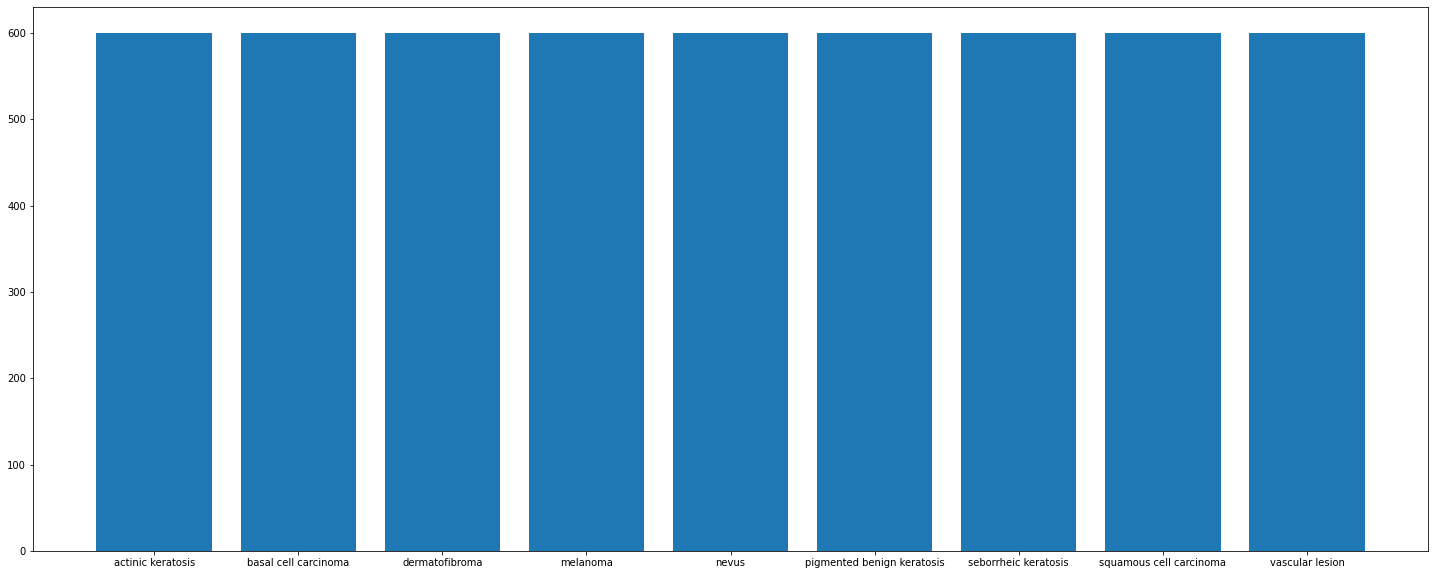

In [36]:
# Find the distribution of classes in the training dataset
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Note:**

So, now we have added 100 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [37]:
# Initialize the batch size and the image size
batch_size = 32
img_height = 180
img_width = 180

In [38]:
# Create training dataset"
import pathlib
path_to_train_directory="/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(path_to_train_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


In [39]:
# Create Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


# Model5

In [42]:
num_classes = 9
model=models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,32),padding = 'same'))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Number of epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


191/191 [==============================] - 32s 159ms/step - loss: 2.1371 - accuracy: 0.1945 - val_loss: 1.8763 - val_accuracy: 0.2757
Epoch 2/30
191/191 [==============================] - 34s 175ms/step - loss: 1.7929 - accuracy: 0.3200 - val_loss: 1.5912 - val_accuracy: 0.3811
Epoch 3/30
191/191 [==============================] - 32s 162ms/step - loss: 1.6388 - accuracy: 0.3773 - val_loss: 1.4981 - val_accuracy: 0.4145
Epoch 4/30
191/191 [==============================] - 31s 159ms/step - loss: 1.5480 - accuracy: 0.4048 - val_loss: 1.4047 - val_accuracy: 0.4283
Epoch 5/30
191/191 [==============================] - 31s 158ms/step - loss: 1.5200 - accuracy: 0.4077 - val_loss: 1.4458 - val_accuracy: 0.4394
Epoch 6/30
191/191 [==============================] - 31s 159ms/step - loss: 1.4593 - accuracy: 0.4378 - val_loss: 1.4977 - val_accuracy: 0.4348
Epoch 7/30
191/191 [==============================] - 31s 160ms/step - loss: 1.4202 - accuracy: 0.4462 - val_loss: 1.2641 - val_accuracy: 0.4

**Observation**

1. There is no much improvement in the accuracy.

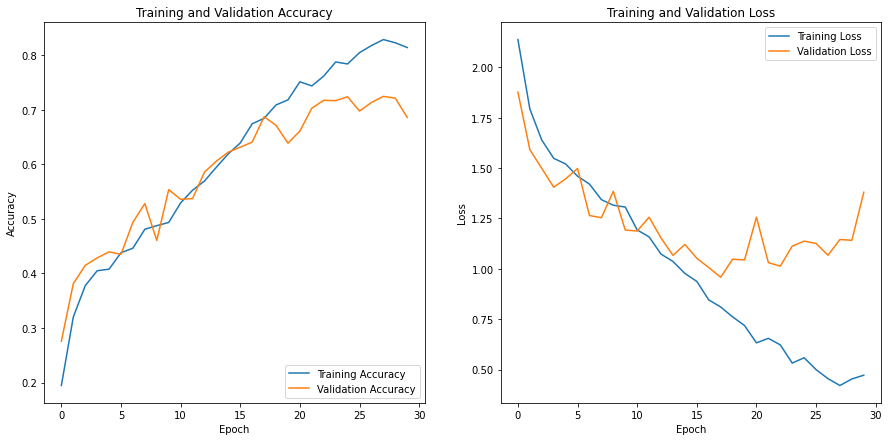

In [43]:
# Visualizing the result of Model4
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Observation**

1. The loss of training dataset decreases with each epoch but the loss of validation dataset almost remains same after 18th epoch.
2. The accuracy of training dataset increases but the validation dataset remains same after 18th epoch. 

# Conclusion

1. Model1 is the simple CNN based architecture trained for 20 epoch using the raw dataset to classify the images.
2. Model1 shows Overfitting issue.
3. To overcome by overfitting problem we uses data augmentation strategy and built Model2.
4. Model2 is not showing much imrovement. Model2 also shows the overfitting problem.
5. Used Augmentor library to rectify the imbalance of samples over each class.
6. Built the Model3 using newly created dataset.
7. The accuracy of the Model3 is improved after using the Augmentor library and rectifying the imbalance of samples of each class.
8. Model3 shows 83.03% accuracy of training and 78.40% of accuracy of validation data set, but it is not enough.
9. Model4 is built by adding Dropout layer to the Convolution layer of Model3 architecture, no much improvemnet in accuracy.
10. Model5 is built using the new dataset by adding some more augmented data. There is no much improvement in accuracy.

# Future Enhancement

1. We can add more data by considering the suitable data augmentation operation and build the model using new dataset.
2. We can improve the model by adding more convolution layers to the network.


